In [2]:
import pandas as pd
import numpy as np
import joblib as jb
from scipy.stats import spearmanr
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
train_train_level0 = jb.load("train_train_level0.pkl.z")
train_train_level1 = jb.load("train_train_level1.pkl.z")
train_valid_level1 = jb.load("train_valid_level1.pkl.z")
test = pd.read_feather("test.f")


X_train0, y_train0 = train_train_level0.filter(regex=r'feature', axis=1), train_train_level0['target_kazutsugi']
X_train1, y_train1 = train_train_level1.filter(regex=r'feature', axis=1), train_train_level1['target_kazutsugi']
X_val1, y_val1 = train_valid_level1.filter(regex=r'feature', axis=1), train_valid_level1['target_kazutsugi']
X_test, y_test = test.filter(regex=r'feature', axis=1), test['target_kazutsugi']

In [4]:
import glob
import re


preds_train1 = glob.glob("./preds_train1/*.pkl.z")
preds_val1 = glob.glob("./preds_val1/*.pkl.z")

df_train1 = []
for p_name in preds_train1:
    p = jb.load(p_name)
    p_name = re.search(r"train1/(.*)\.pkl.z", p_name).group(1)
    p_df = pd.DataFrame(p, columns=[p_name])
    df_train1.append(p_df)
    
    
df_val1 = [] 
scores_val1 = dict()
for p_name in preds_val1:
    p = jb.load(p_name)
    p_name = re.search(r"val1/(.*)\.pkl.z", p_name).group(1)
    p_df = pd.DataFrame(p, columns=[p_name])
    df_val1.append(p_df)
    scores_val1[p_name] = spearmanr(y_val1, p_df).correlation
    
    
df_train1 = pd.concat(df_train1, axis=1)
df_val1 = pd.concat(df_val1, axis=1)

/Users/mariofilho/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:4196: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [5]:
df_train1.shape

(178773, 208)

In [6]:
df_val1.shape

(180938, 208)

In [7]:
df_test = [] 
scores_test = dict()
preds_test = glob.glob("./preds_test/*.pkl.z")
for p_name in preds_test:
    p = jb.load(p_name)
    p_name = re.search(r"test/(.*)\.pkl.z", p_name).group(1)
    p_df = pd.DataFrame(p, columns=[p_name])
    df_test.append(p_df)
    scores_test[p_name] = spearmanr(y_test, p_df).correlation
    
    
df_test = pd.concat(df_test, axis=1)

In [8]:
scores_val1_series = pd.Series(scores_val1)
#scores_val1_series.index = scores_val1_series.index.str.extract(r"val1/(.*)\.pkl.z")

scores_test_series = pd.Series(scores_test)
#scores_test_series.index = scores_test_series.index.str.extract(r"test/(.*)\.pkl.z")

In [9]:
scores_val1_series.head()

mlp_1006_1472_1052_0.9092974010053942_0.1333332413920129_0.8265828954405148_2.6352640400187277e-05    0.002579
lgbm_170_624_0.002423157857285798                                                                     0.028030
mlp_99_36_0.001923795074543559                                                                        0.011610
xgb_rf                                                                                                0.033152
mlp_67_21_3.5100442309980525e-05                                                                      0.010232
dtype: float64

In [10]:
scores_test_series.head()

mlp_1006_1472_1052_0.9092974010053942_0.1333332413920129_0.8265828954405148_2.6352640400187277e-05    0.009182
lgbm_170_624_0.002423157857285798                                                                     0.022915
mlp_99_36_0.001923795074543559                                                                        0.009473
xgb_rf                                                                                                0.022392
mlp_67_21_3.5100442309980525e-05                                                                      0.004667
dtype: float64

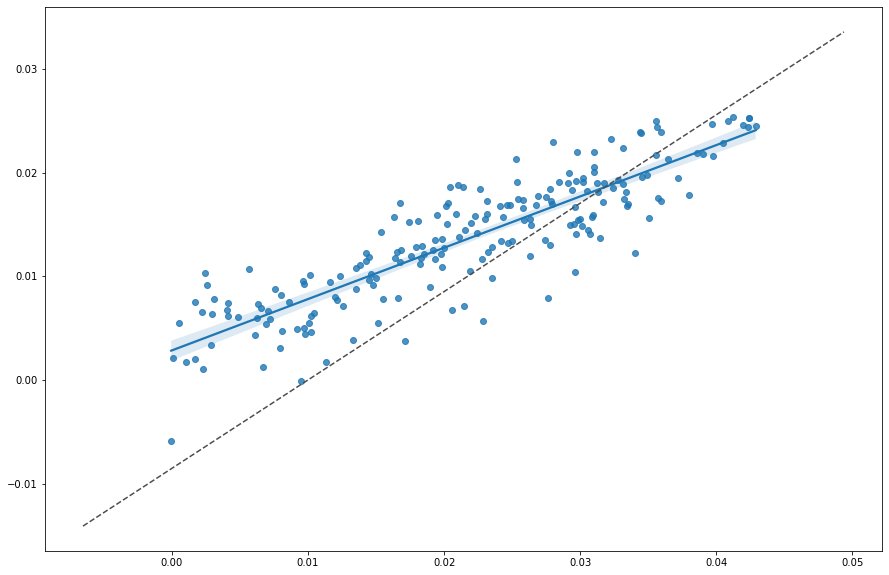

In [11]:
import seaborn as sns
fig, ax = pylab.subplots(1,1, figsize=(15,10))
sns.regplot(scores_val1_series, scores_test_series,ax=ax)
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")